In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

## 2. Read file

In [15]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3. Understanding Data

In [16]:
df.shape

(891, 12)

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [21]:
df.shape

(891, 12)

In [22]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
for i in df.columns:
    if(df[i].dtypes == "object"):
        x = df[i].mode()[0]
        df[i]=df[i].fillna(x)
    else:
        x = df[i].mean()
        df[i]=df[i].fillna(x)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [25]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
df['sex'] = lable.fit_transform(df['Sex'])

In [27]:
emb = df.Embarked 
dummy1 = pd.get_dummies(emb) 
dummy1.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
df = pd.concat([df,dummy1],axis=1)

## 4. Data Visualization

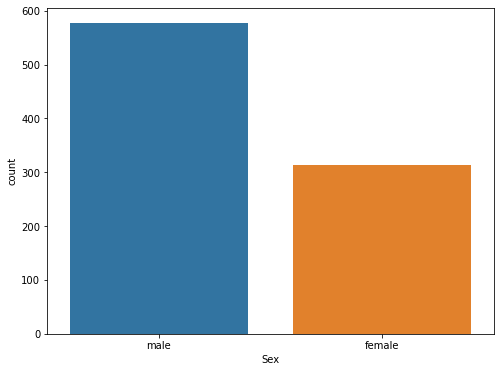

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(df['Sex']);
plt.show()

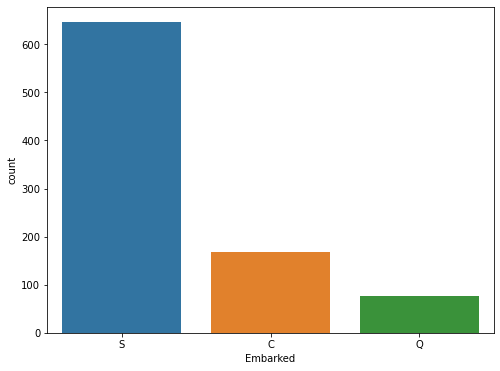

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(df['Embarked']);
plt.show()

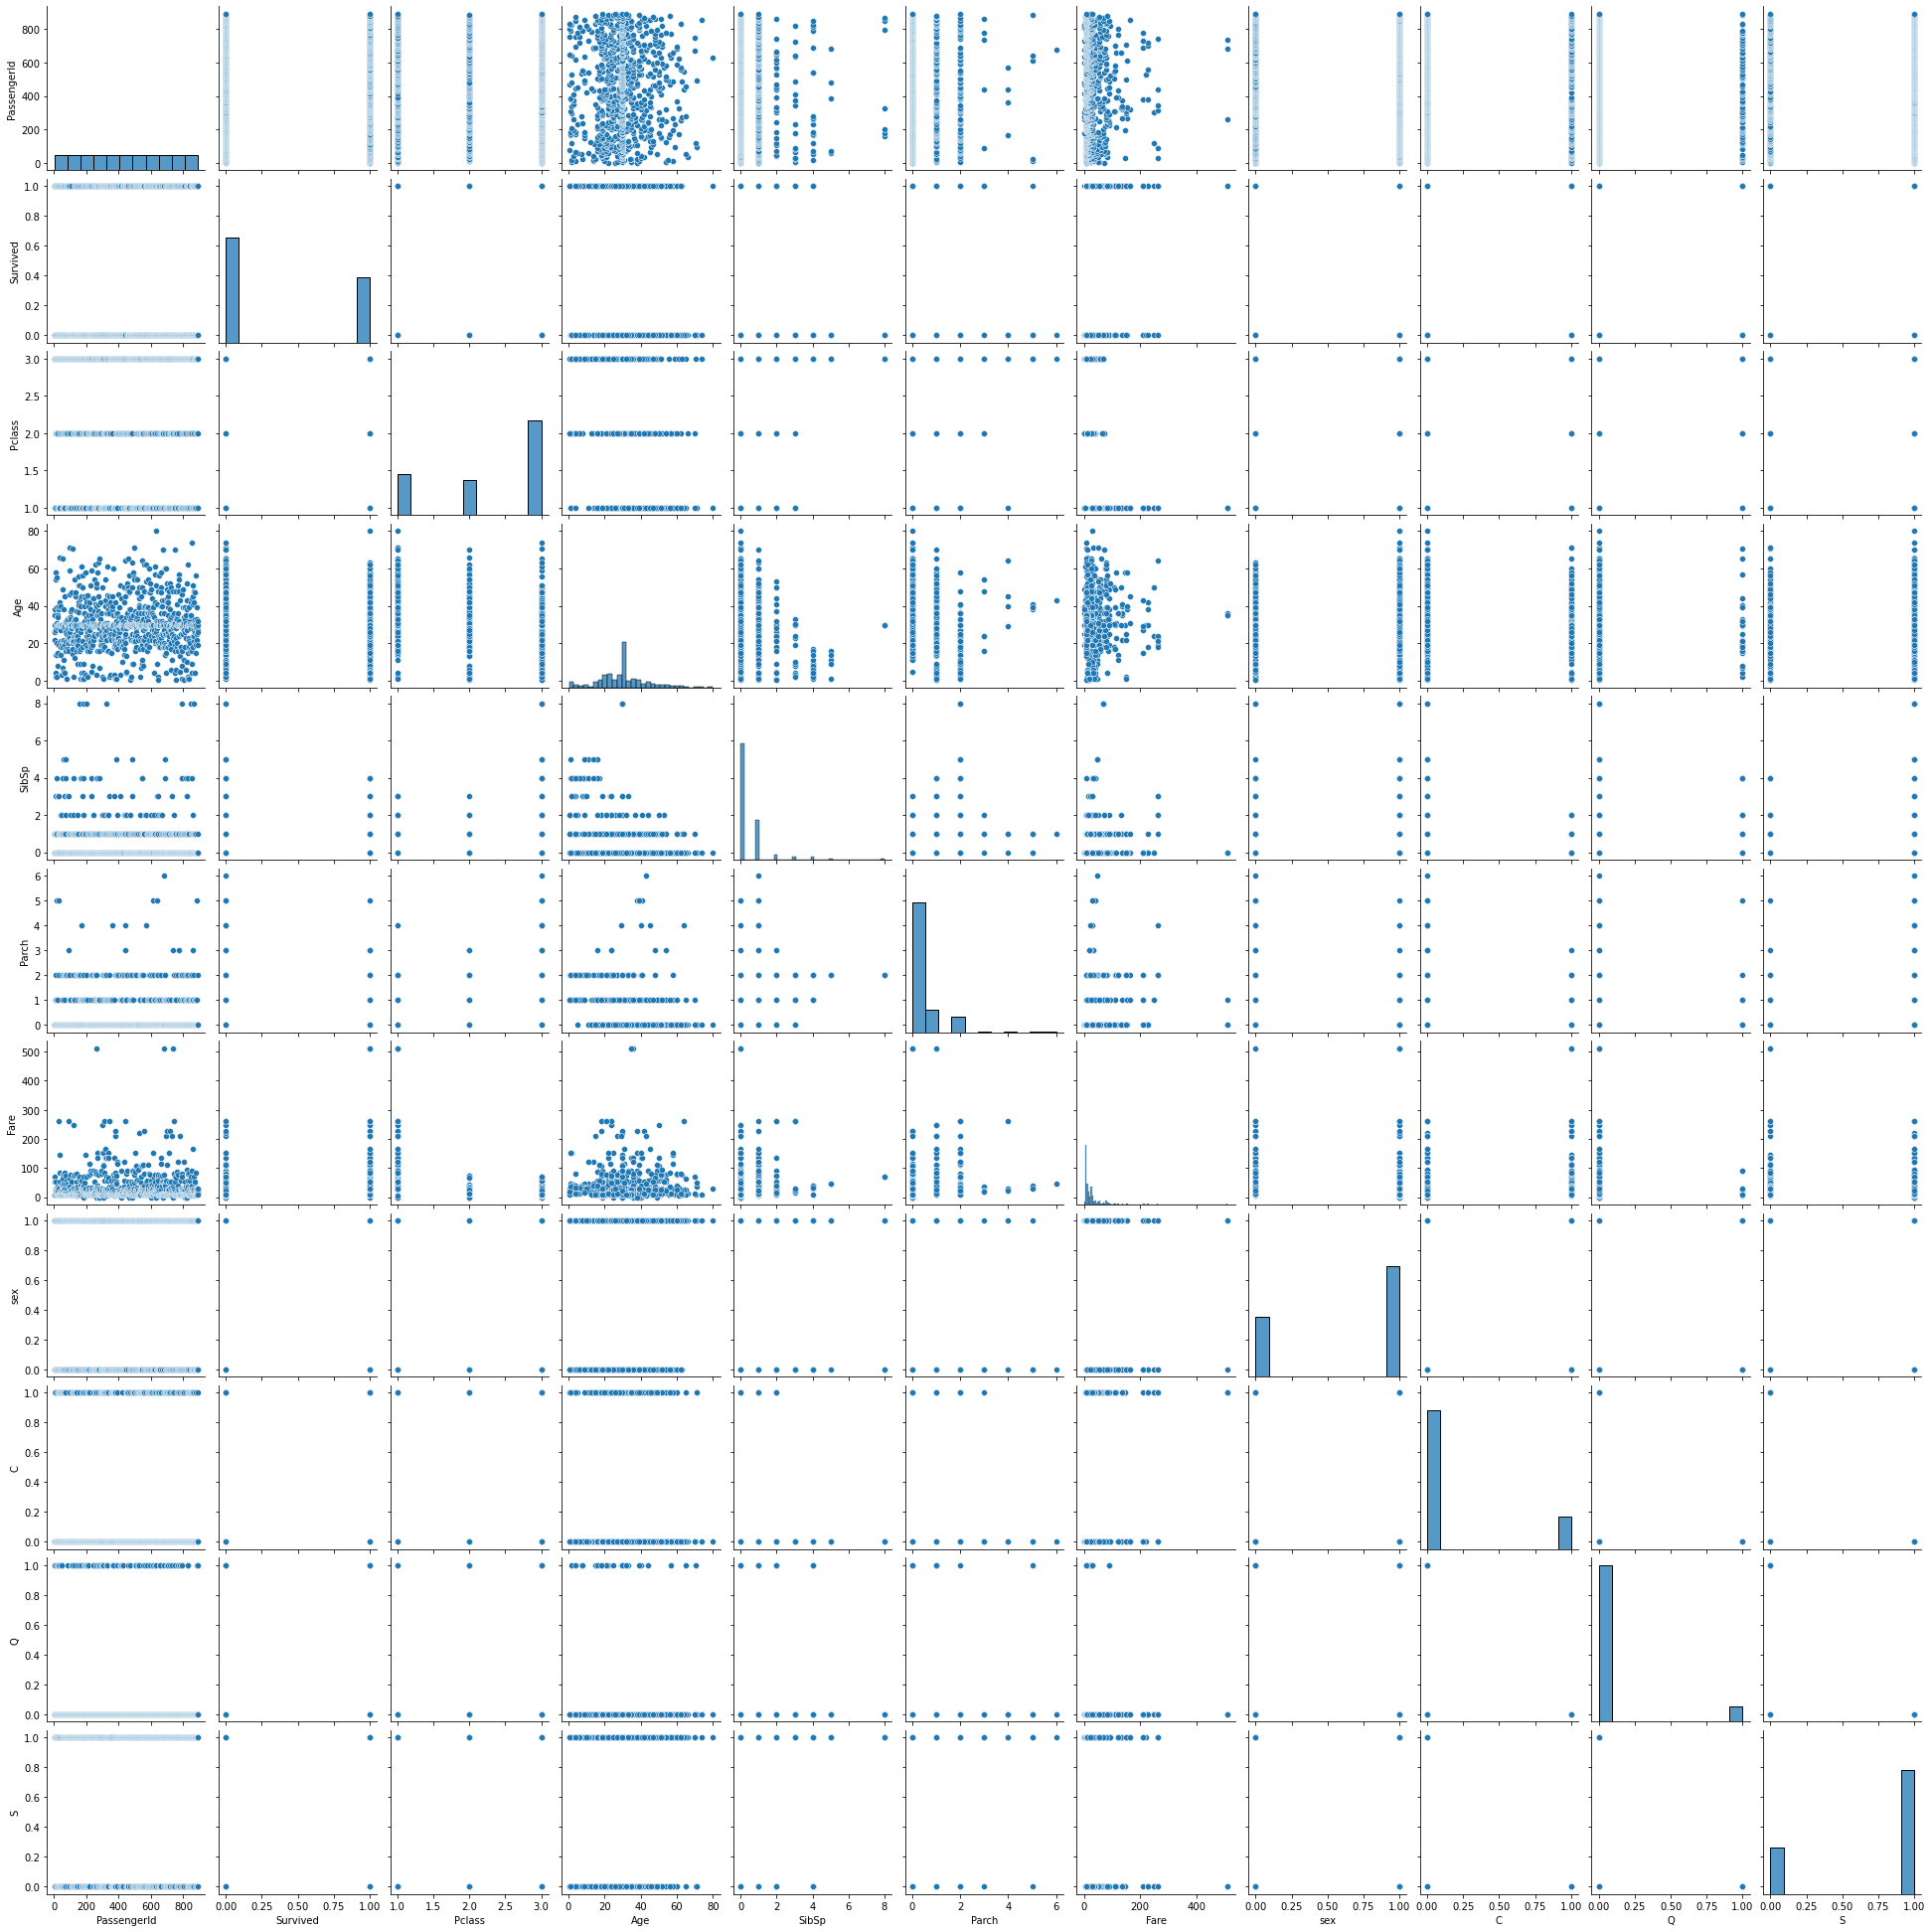

In [31]:
sns.pairplot(data=df)
plt.show()

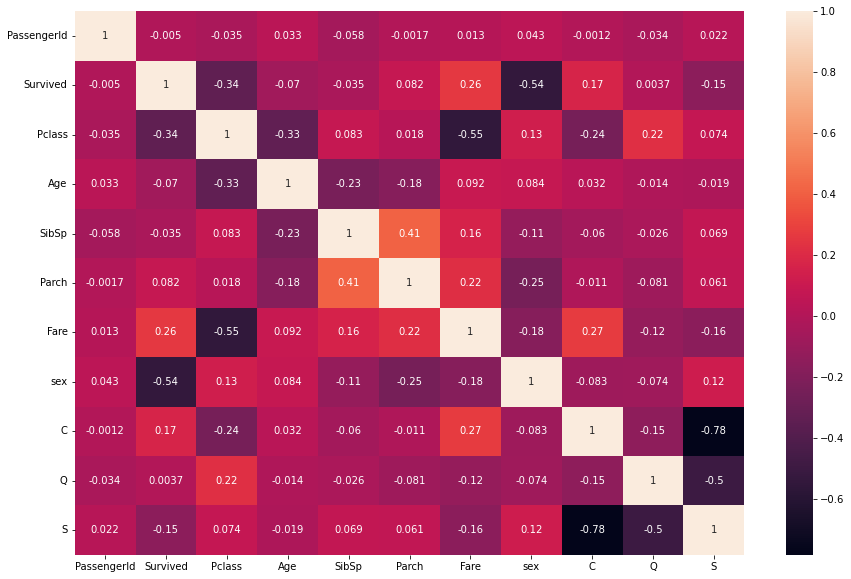

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [33]:
df.drop(columns=['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

In [34]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [35]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [36]:
df['rich'] = (df['Fare'] >= 50).astype(int)
df.drop(columns='Fare',inplace=True)

In [37]:
df['child'] = (df['Age'] <=18).astype(int)
df.drop(columns='Age',inplace=True)

## 5. Model Building

In [38]:
X = df.drop(columns=['SibSp','Survived'],axis=1)
y = df[['Survived']]

In [39]:
X.shape , y.shape

((891, 8), (891, 1))

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [41]:
X_train.shape , X_test.shape

((712, 8), (179, 8))

In [42]:
y_train.shape , y_test.shape

((712, 1), (179, 1))

In [43]:
X

,Pclass,Parch,sex,C,Q,S,rich,child
0,3,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0
2,3,0,0,0,0,1,0,0
3,1,0,0,0,0,1,1,0
4,3,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
886,2,0,1,0,0,1,0,0
887,1,0,0,0,0,1,0,0
888,3,2,0,0,0,1,0,0
889,1,0,1,1,0,0,0,0


## 6. Model Training

### 1. LogisticRegression

In [44]:
logist = LogisticRegression()
logist.fit(X_train,y_train)

LogisticRegression()

### 2. RandomForest

In [47]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

### 3.  DecisionTree

In [48]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

## 7. Model Testing

### 1. LogisticRegression

In [50]:
y_pred_train = logist.predict(X_train)

### 2.  DecisionTree

In [51]:
y_pred_train1 = dt_model.predict(X_train)

### 3. RandomForest

In [53]:
y_pred_train2 = rf_model.predict(X_train)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred_train)

0.8033707865168539

In [55]:
accuracy_score(y_train,y_pred_train1)

0.8497191011235955

In [56]:
accuracy_score(y_train,y_pred_train2)

0.8497191011235955

In [64]:
y_pred_test = logist.predict(X_test)

In [65]:
y_pred_test1 = dt_model.predict(X_test)

In [66]:
y_pred_test2 = rf_model.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred_test)

0.7877094972067039

In [68]:
accuracy_score(y_test,y_pred_test1)

0.7318435754189944

In [69]:
accuracy_score(y_test,y_pred_test2)

0.7653631284916201

0.7818811554193095


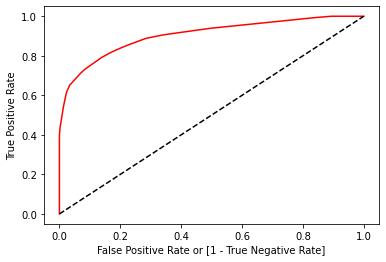

In [71]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr ,thresholds = roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

plt.plot(fpr,tpr,color='red',label='logit(area =%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

0.7818811554193095


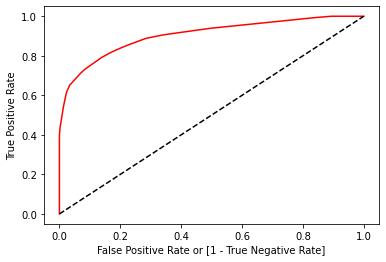

In [72]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr ,thresholds = roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

plt.plot(fpr,tpr,color='red',label='dt_mode(area =%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

0.7818811554193095


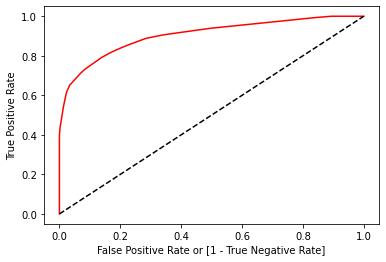

In [73]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr , tpr ,thresholds = roc_curve(y_train,dt_model.predict_proba(X_train)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

plt.plot(fpr,tpr,color='red',label='rf_model(area =%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

## THE END!!!